In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Spaceship Titanic

*Visit the related Kaggle competition page [here](https://www.kaggle.com/competitions/spaceship-titanic/overview)*

**Goal**: Focus on the first steps of a data science project

**Steps**:
1. Analyze data quality (by describing)
    - Check what features are there
    - Check feature types
    - Check for missing values
    - Check for duplicate data points/entries
2. Analyze data relations (by visualizing the data):
*get an idea of how features relate to the outcome `Transported` and to each other*
    - Visualize continuous features
        - Should we apply binning?
        - Should we apply univariate nonlinear transformations?
    - Visualize categorical features 
    - Check other features
        - Could we transform these features into more useful ones?
    - Can we combine/tranform features?
    - Can we drop features?
3. Wrangle the data (correcting, creating, and completing data) --> **Next steps**
    - Create new features from exisiting ones
    - Impute missing values
    - Drop unwanted features
    - Transform data 
    - Encode 
    - Scale


In [2]:
train_df = pd.read_csv('train_spaceship_titanic.csv')
test_df = pd.read_csv('test_spaceship_titanic.csv')

combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

### Analyze by describing the data

In [3]:
print(train_df.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


In [4]:
combined_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_df.count()

PassengerId     8693
HomePlanet      8492
CryoSleep       8476
Cabin           8494
Destination     8511
Age             8514
VIP             8490
RoomService     8512
FoodCourt       8510
ShoppingMall    8485
Spa             8510
VRDeck          8505
Name            8493
Transported     8693
dtype: int64

In [6]:
# Missing values
print(f"Missing values in train [%]: \n {100*(train_df.isnull().sum()/train_df.count())}")
print(f"Missing values in test [%]: \n {100*(test_df.isnull().sum()/test_df.count())}")

Missing values in train [%]: 
 PassengerId     0.000000
HomePlanet      2.366934
CryoSleep       2.560170
Cabin           2.342830
Destination     2.138409
Age             2.102420
VIP             2.391048
RoomService     2.126410
FoodCourt       2.150411
ShoppingMall    2.451385
Spa             2.150411
VRDeck          2.210464
Name            2.354880
Transported     0.000000
dtype: float64
Missing values in test [%]: 
 PassengerId     0.000000
HomePlanet      2.076372
CryoSleep       2.222753
Cabin           2.394063
Destination     2.198327
Age             2.173913
VIP             2.222753
RoomService     1.954708
FoodCourt       2.541357
ShoppingMall    2.345059
Spa             2.418582
VRDeck          1.906123
Name            2.247191
dtype: float64


24.01% of the passengers in train_df miss at least one value
23.29% of the passengers in test_df miss at least one value


<AxesSubplot: >

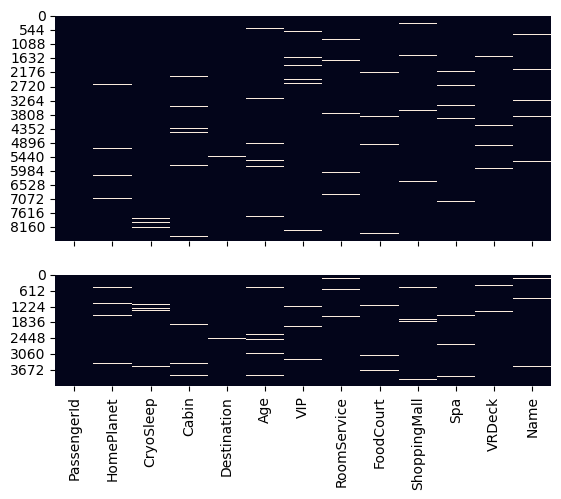

In [7]:
train_missing_pct = 100*(train_df.isnull().any(axis=1).sum()/len(train_df))
test_missing_pct = 100*(test_df.isnull().any(axis=1).sum()/len(test_df))
print(f"{train_missing_pct:.2f}% of the passengers in train_df miss at least one value")
print(f"{test_missing_pct:.2f}% of the passengers in test_df miss at least one value")

fig, ax = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [len(train_df), len(test_df)]})

sns.heatmap(train_df.isnull(), cbar=False, ax=ax[0])
sns.heatmap(test_df.isnull(), cbar=False, ax=ax[1])

In [8]:
combined_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported      object
dtype: object

In [9]:
print("Checking for duplicates")
print(f"Number of duplicates in the train set: \n {train_df.duplicated().sum()}")
print(f"Number of duplicates in the test set: \n {test_df.duplicated().sum()}")

Checking for duplicates
Number of duplicates in the train set: 
 0
Number of duplicates in the test set: 
 0


### Preliminary data findings
- Categorical features: HomePlanet, CryoSleep, Cabin, Destination, VIP, Transported
- Numerical features: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
- Other features: 
    - PassengerId, potentially a valuable feature as this indicates to what group a passenger belongs to
    - Name, could indicate to which family passenger belongs to

To do:
1. <span style="color:red">**We need to come up with a strategy for missing data**</span>. Simply dropping rows that contain NaN values, will result in losing ~24% of the train and test data
2. <span style="color:red">**To be able to use multiple ML methods, tranforming to be numeric (int64 or float64) is preferred**</span>
3. <span style="color:red">**To be able to use multiple ML methods, scaling the data is preferred**</span>
3. <span style="color:red">**New, more useful features could be created**</span>

### Further data analysis

- More than 75% of the passengers were younger than 38
- For each amenity category, the expenses of the 50 percentile passenger is 0
- On average, people spend most on the `FoodCourt` category
- Not all names are unique
- Most people weren't VIPs
- 'TRAPPIST-1E' was the most popular destination
- The highest number of people in a cabin is 8
- Most people were not in CryoSleep
- Most people have Earth as their `HomePlanet`
- **Just over 50% of the passengers in the training data set were transported**

In [10]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
train_df.describe(include=['O', 'bool'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


### Analyze by visualizing the data

#### Continuous features

Age

Text(0.5, 1.0, 'Age distribution')

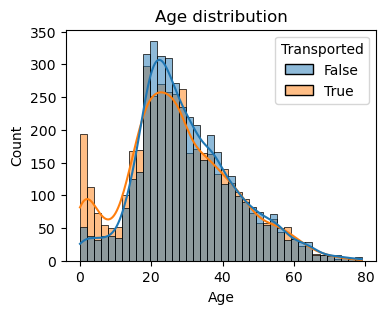

In [12]:
fig, ax = plt.subplots(figsize=(4,3))

sns.histplot(data=train_df, x='Age', hue="Transported", kde=True, bins=40)
ax.set_title("Age distribution")

Findings:
- Passengers between 0-18 years old had a higher chance of being transported
- Passengers between 20-25 years old had a slightly higher chance of not being transported
- Passengers over 25 years old were about equally likely to be transported than not

To do:
- <span style="color:red">**Suggested by other Kaggle users: apply binning for `Age` for the purpose of imputing e.g. missing expenditure values according to age group**</span> 

Why binning in general? Reasons I could come up with:
- Outlier handling/ noise reduction: Binning can help outlier handling as outliers will be binned together with other values in the bin
- Simplicity: Making the continuous Age feature 'simpler' by assigning three age groups.
- Handling non-linearities: In case of a non-linear relationship between feature and output, binning might improve the performance of linear ML methods (each bin is encoded as a extra categorical feature)

Continuous features: `RoomService`, `VRDeck`, `Spa` `FoodCourt`, and `Shopping Mall`

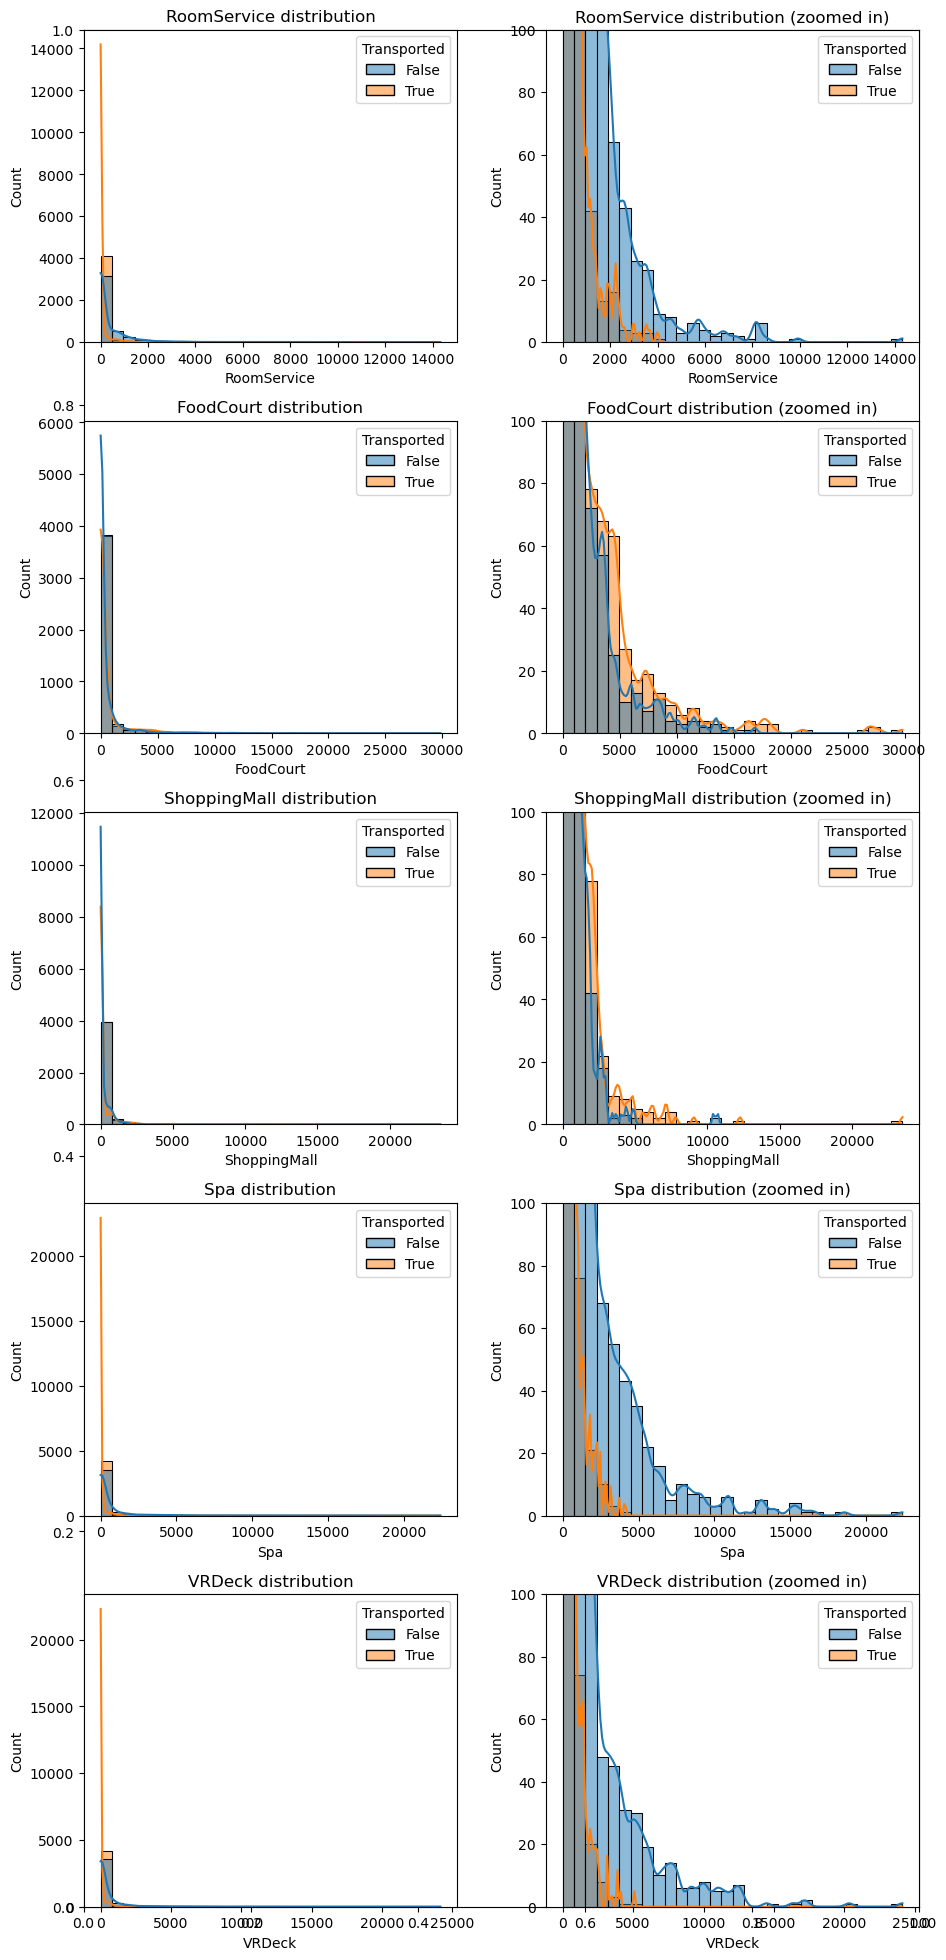

In [13]:
luxury_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, ax = plt.subplots(figsize=(10, 20))

for i, feature in enumerate(luxury_features):
    ax = fig.add_subplot(5, 2, 2*i+1)
    sns.histplot(data=train_df, x=feature, hue="Transported", kde=True, axes = ax, bins=30)
    ax.set_title(f"{feature} distribution")

    ax = fig.add_subplot(5, 2, 2*i+2)
    sns.histplot(data=train_df, x=feature, hue="Transported", kde=True, axes = ax, bins=30)
    ax.set_title(f"{feature} distribution (zoomed in)")
    ax.set_ylim(0, 100)


fig.tight_layout()
plt.show()

Left: regular aminity count-plots. Right: zoomed in plots due to heavily skewed data

Findings:
- For each aminity category, most passengers did not spend anything (left plots 0-bar)
- People that did not spend anything tend to be transported (big difference between sum of left blue peaks and orange peaks)
- Counts decrease exponentially with increasing costs
- Passengers that did not spend anything on `RoomService`, `VRDeck` and `Spa` were likely to be transported. The opposite is applicable for `FoodCourt`, and `Shopping Mall`. This might indicate that people spending more money on more 'luxury' aminities are less likely to boe transported 

To do:
- <span style="color:red">**Create a (continuous) total `expenditure` feature**</span> 
- <span style="color:red">**Create a (categorical) `did_spend` feature**</span> 
- <span style="color:red">**Group more 'essential' (`FoodCourt`, `Shopping Mall`) and 'luxury' (`RoomService`, `VRDeck`, `Spa`) features and create categorical `did_spend_luxury` and `did spend_essential`**</span> 
- <span style="color:red">**Apply log transformation to the heaviliy skewed data**</span> 

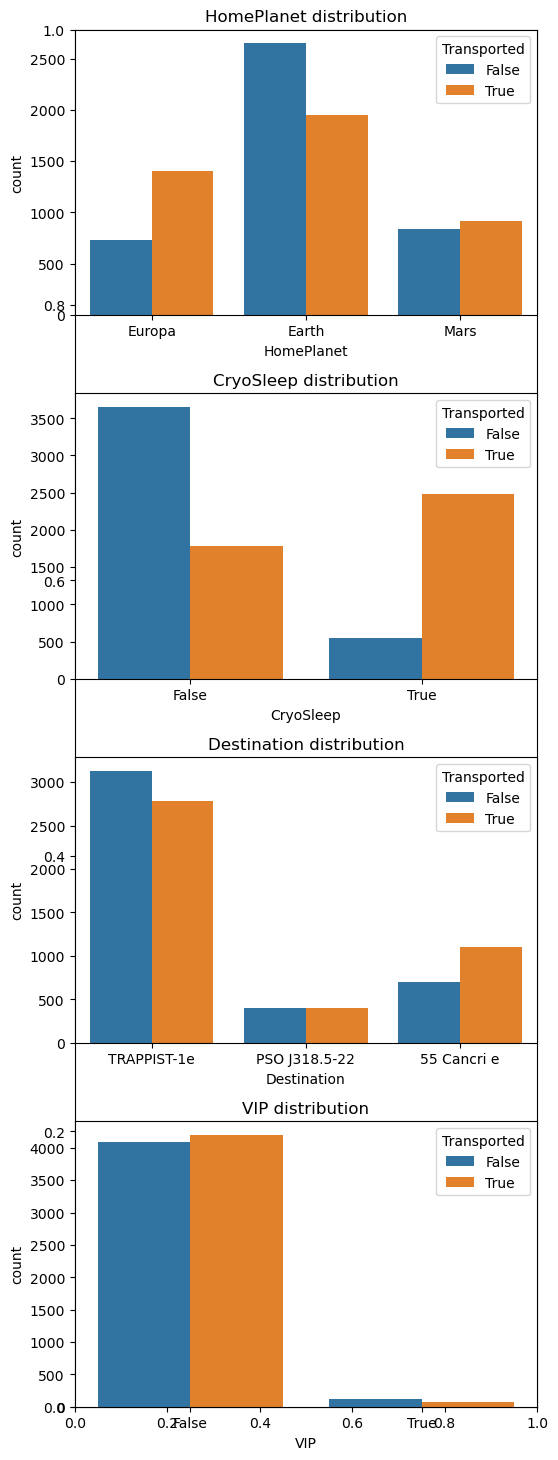

In [14]:
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, ax = plt.subplots(figsize=(6, 15), sharex=False)

for i, feature in enumerate(categorical_features):
    ax = fig.add_subplot(len(categorical_features), 1, i+1)
    sns.countplot(data=train_df, x=feature, hue="Transported", axes = ax)
    ax.set_title(f"{feature} distribution")

plt.tight_layout()


#### Visualizing categorical features

Insights:
- Most people were from `HomePlanet` Earth
- Passengers from Earth were most likely to survive, Europa passengers were least likely to survive
- Most people we not in `CryoSleep`
- Passengers that were in CryoSleep, had a 80% chance of being transported
- If you we not in Cryosleep, the chance of transportation was ~33%
- VIP does hardly say anything about the chance of being transported

To do:
<span style="color:red">**Let's drop VIP from the feature space to simplify**</span> 

#### Other features

Could be used to transform and create more useful features

For example:
- The first 4 digits of `PassengerId` indicate the group the passenger belongs to (given in the Kaggle data description)
- The last 2 digits of `PassengerId` indicate the number of the passenger within the group (also given in the Kaggle data description). This could say something about group sizes
- `Cabin` indicates `P` and `S`, which is the location of the Cabin on the spaceship
- Using the `Name` feature, we could create a `Family` or `Surname` feature and subsequent a `FamilySize` feature

To do: <span style="color:red">**Further investigate relevancy of features resulting from 'other features'**</span> 


In [15]:
other_features = ['PassengerId', 'Name', 'Cabin']
train_df[other_features].head()

,PassengerId,Name,Cabin
0,0001_01,Maham Ofracculy,B/0/P
1,0002_01,Juanna Vines,F/0/S
2,0003_01,Altark Susent,A/0/S
3,0003_02,Solam Susent,A/0/S
4,0004_01,Willy Santantines,F/1/S


### Feature Engineering (WIP)

In [16]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

bins = [0, 10, 20, 30, 50, 80]
train_groups = np.digitize(train_df['Age'].values, bins=bins)
test_groups = np.digitize(test_df['Age'].values, bins=bins)

In [17]:
encoder = OneHotEncoder(sparse=False)
train_arr = encoder.fit_transform(train_groups.reshape(-1, 1))
test_arr = encoder.transform(test_groups.reshape(-1, 1))

group_names = ['0-10', '10-20', '20-30', '30-50', '50-80']

# Add the encoded column to the dataframe
for i, group in enumerate(group_names):
    train_df.loc[:, f"AgeGroup{group}"] = train_arr[:, i]
    test_df.loc[:, f"AgeGroup{group}"] = test_arr[:, i]

c:\Users\LuukvanRoessel\Anaconda3\envs\ml-luuk\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
